## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.233190  0.882674  1.092579  0.829401 -1.314297  0.983998
1 -0.917869  0.677570 -0.867610  1.321422  1.251739  1.099096
2 -0.017036 -0.879620 -0.312517 -0.248316 -0.638175 -0.860215
3  0.817825 -0.649416  0.361289  0.274493 -0.701385  0.080075
4  0.031022 -1.809871 -0.571246 -1.074296 -0.188479 -1.953273


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9808202	total: 58ms	remaining: 57.9s
1:	learn: 0.9704373	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9609509	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9513515	total: 59.6ms	remaining: 14.8s
4:	learn: 0.9424828	total: 60ms	remaining: 11.9s
5:	learn: 0.9340259	total: 60.6ms	remaining: 10s
6:	learn: 0.9240555	total: 61.1ms	remaining: 8.67s
7:	learn: 0.9146067	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9056531	total: 62.2ms	remaining: 6.85s
9:	learn: 0.8977347	total: 62.7ms	remaining: 6.21s
10:	learn: 0.8878247	total: 63.3ms	remaining: 5.69s
11:	learn: 0.8787807	total: 63.8ms	remaining: 5.26s
12:	learn: 0.8700804	total: 64.2ms	remaining: 4.88s
13:	learn: 0.8627670	total: 64.7ms	remaining: 4.56s
14:	learn: 0.8564679	total: 65.2ms	remaining: 4.28s
15:	learn: 0.8476198	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8411704	total: 66.1ms	remaining: 3.82s
17:	learn: 0.8336428	total: 66.6ms	remaining: 3.63s
18:	learn: 0.8275379	total: 67.2ms	remaining: 3.47

99:	learn: 0.4275912	total: 108ms	remaining: 973ms
100:	learn: 0.4248397	total: 109ms	remaining: 966ms
101:	learn: 0.4219061	total: 109ms	remaining: 961ms
102:	learn: 0.4192842	total: 110ms	remaining: 955ms
103:	learn: 0.4155663	total: 110ms	remaining: 948ms
104:	learn: 0.4128563	total: 111ms	remaining: 942ms
105:	learn: 0.4096632	total: 111ms	remaining: 936ms
106:	learn: 0.4063437	total: 112ms	remaining: 931ms
107:	learn: 0.4031987	total: 112ms	remaining: 926ms
108:	learn: 0.4004750	total: 113ms	remaining: 921ms
109:	learn: 0.3977345	total: 113ms	remaining: 915ms
110:	learn: 0.3944130	total: 114ms	remaining: 910ms
111:	learn: 0.3919333	total: 114ms	remaining: 906ms
112:	learn: 0.3888264	total: 115ms	remaining: 900ms
113:	learn: 0.3860177	total: 115ms	remaining: 895ms
114:	learn: 0.3830208	total: 116ms	remaining: 891ms
115:	learn: 0.3803808	total: 116ms	remaining: 886ms
116:	learn: 0.3774337	total: 117ms	remaining: 881ms
117:	learn: 0.3744189	total: 117ms	remaining: 876ms
118:	learn: 0

258:	learn: 0.1362349	total: 187ms	remaining: 535ms
259:	learn: 0.1353060	total: 188ms	remaining: 534ms
260:	learn: 0.1341378	total: 188ms	remaining: 533ms
261:	learn: 0.1331693	total: 188ms	remaining: 531ms
262:	learn: 0.1325947	total: 189ms	remaining: 529ms
263:	learn: 0.1315943	total: 189ms	remaining: 528ms
264:	learn: 0.1307283	total: 190ms	remaining: 527ms
265:	learn: 0.1297432	total: 191ms	remaining: 526ms
266:	learn: 0.1289892	total: 191ms	remaining: 524ms
267:	learn: 0.1281037	total: 191ms	remaining: 523ms
268:	learn: 0.1276499	total: 192ms	remaining: 521ms
269:	learn: 0.1270728	total: 192ms	remaining: 520ms
270:	learn: 0.1262762	total: 193ms	remaining: 519ms
271:	learn: 0.1254384	total: 193ms	remaining: 517ms
272:	learn: 0.1243868	total: 194ms	remaining: 516ms
273:	learn: 0.1235377	total: 194ms	remaining: 515ms
274:	learn: 0.1228433	total: 195ms	remaining: 514ms
275:	learn: 0.1219363	total: 195ms	remaining: 513ms
276:	learn: 0.1210199	total: 196ms	remaining: 512ms
277:	learn: 

468:	learn: 0.0435665	total: 292ms	remaining: 330ms
469:	learn: 0.0433728	total: 292ms	remaining: 330ms
470:	learn: 0.0431279	total: 293ms	remaining: 329ms
471:	learn: 0.0429848	total: 293ms	remaining: 328ms
472:	learn: 0.0427468	total: 294ms	remaining: 327ms
473:	learn: 0.0425085	total: 294ms	remaining: 327ms
474:	learn: 0.0423696	total: 295ms	remaining: 326ms
475:	learn: 0.0421397	total: 295ms	remaining: 325ms
476:	learn: 0.0418582	total: 296ms	remaining: 324ms
477:	learn: 0.0417237	total: 296ms	remaining: 323ms
478:	learn: 0.0414980	total: 297ms	remaining: 323ms
479:	learn: 0.0414233	total: 297ms	remaining: 322ms
480:	learn: 0.0412017	total: 297ms	remaining: 321ms
481:	learn: 0.0411282	total: 298ms	remaining: 320ms
482:	learn: 0.0409216	total: 298ms	remaining: 319ms
483:	learn: 0.0407939	total: 299ms	remaining: 319ms
484:	learn: 0.0407226	total: 299ms	remaining: 318ms
485:	learn: 0.0405072	total: 300ms	remaining: 317ms
486:	learn: 0.0404371	total: 300ms	remaining: 317ms
487:	learn: 

627:	learn: 0.0279376	total: 369ms	remaining: 219ms
628:	learn: 0.0279194	total: 370ms	remaining: 218ms
629:	learn: 0.0279014	total: 371ms	remaining: 218ms
630:	learn: 0.0278669	total: 371ms	remaining: 217ms
631:	learn: 0.0277936	total: 371ms	remaining: 216ms
632:	learn: 0.0277026	total: 372ms	remaining: 216ms
633:	learn: 0.0276308	total: 372ms	remaining: 215ms
634:	learn: 0.0275764	total: 373ms	remaining: 214ms
635:	learn: 0.0274549	total: 373ms	remaining: 214ms
636:	learn: 0.0274097	total: 374ms	remaining: 213ms
637:	learn: 0.0273656	total: 374ms	remaining: 212ms
638:	learn: 0.0273098	total: 375ms	remaining: 212ms
639:	learn: 0.0272663	total: 375ms	remaining: 211ms
640:	learn: 0.0271063	total: 376ms	remaining: 211ms
641:	learn: 0.0270542	total: 376ms	remaining: 210ms
642:	learn: 0.0270115	total: 377ms	remaining: 209ms
643:	learn: 0.0268552	total: 377ms	remaining: 209ms
644:	learn: 0.0268043	total: 378ms	remaining: 208ms
645:	learn: 0.0267635	total: 378ms	remaining: 207ms
646:	learn: 

841:	learn: 0.0143128	total: 475ms	remaining: 89.1ms
842:	learn: 0.0142479	total: 475ms	remaining: 88.5ms
843:	learn: 0.0141793	total: 476ms	remaining: 88ms
844:	learn: 0.0141546	total: 476ms	remaining: 87.4ms
845:	learn: 0.0141304	total: 477ms	remaining: 86.8ms
846:	learn: 0.0140668	total: 477ms	remaining: 86.2ms
847:	learn: 0.0140277	total: 478ms	remaining: 85.6ms
848:	learn: 0.0139913	total: 478ms	remaining: 85ms
849:	learn: 0.0139489	total: 479ms	remaining: 84.5ms
850:	learn: 0.0139131	total: 479ms	remaining: 83.9ms
851:	learn: 0.0138672	total: 480ms	remaining: 83.3ms
852:	learn: 0.0138441	total: 480ms	remaining: 82.8ms
853:	learn: 0.0138095	total: 481ms	remaining: 82.2ms
854:	learn: 0.0137649	total: 481ms	remaining: 81.6ms
855:	learn: 0.0137391	total: 482ms	remaining: 81ms
856:	learn: 0.0136954	total: 482ms	remaining: 80.4ms
857:	learn: 0.0136621	total: 483ms	remaining: 79.9ms
858:	learn: 0.0136242	total: 483ms	remaining: 79.3ms
859:	learn: 0.0135572	total: 484ms	remaining: 78.7ms

999:	learn: 0.0079286	total: 553ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

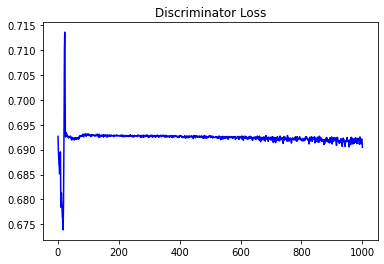

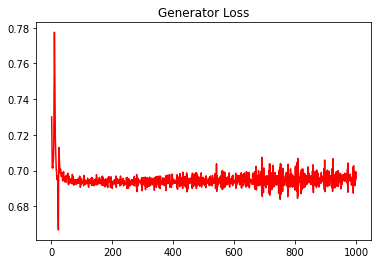

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.27185215134662105


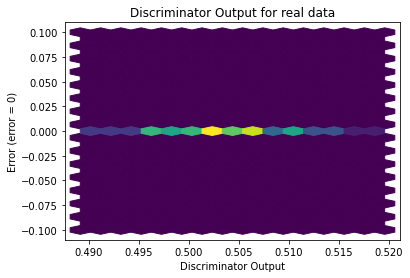

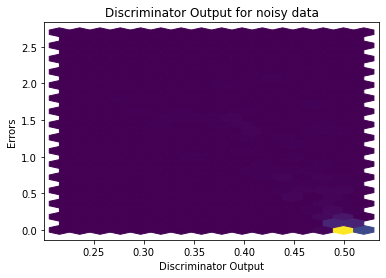

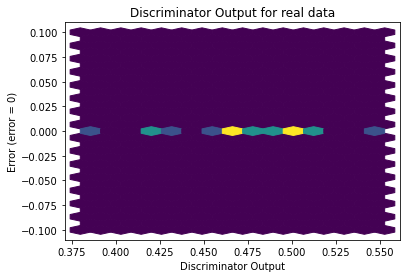

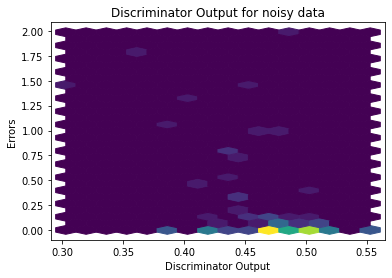

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


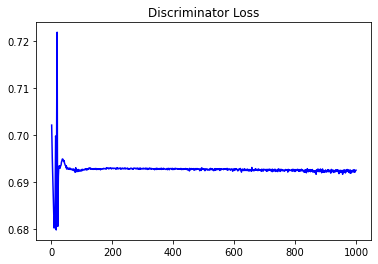

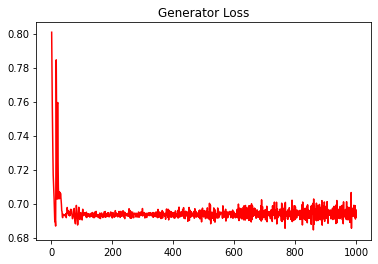

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.280338402622002


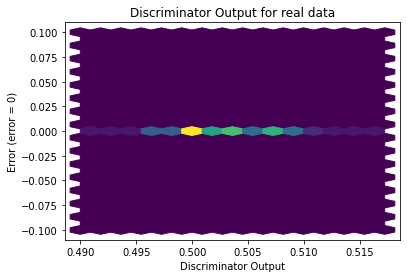

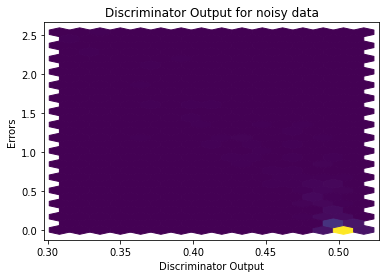

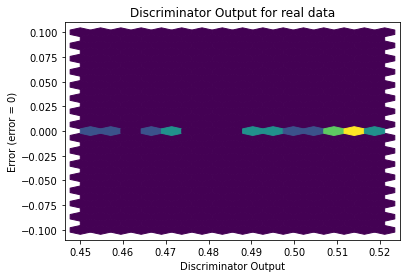

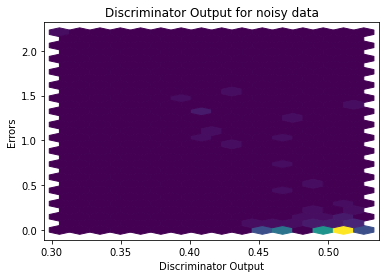

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7252]], requires_grad=True)
